#Código Básico:

In [ ]:
!pip install GEOparse

     |████████████████████████████████| 286kB 7.5MB/s 
  Created wheel for GEOparse: filename=GEOparse-2.0.2-cp36-none-any.whl size=28847 sha256=faa37c6057d0f995c20b7f9007d05480e665720687e98826a966bded44c44cf9
  Stored in directory: /root/.cache/pip/wheels/84/6e/b8/b6497c4f50bde2c3b3f195a470e1bc894312407656896dd6bc
Successfully built GEOparse


In [ ]:
import pandas as pd
import GEOparse
import pylab as pl
import seaborn as sns
import re
import numpy as np
from google.colab import drive
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smfs
import scipy.stats as stats

drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [ ]:
lista_gse_bruto=[]
text=open("/content/drive/My Drive/gds_result.txt")
a=text.read().split()
for i in range(len(a)):
  if a[i].startswith('GSE')==True:
    lista_gse_bruto.append(a[i])

lista_gse=np.unique(lista_gse_bruto).tolist()

In [ ]:
#Organizando o backgroud do gráfico:

pl.rcParams['figure.figsize'] = (14, 10)
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['xtick.labelsize'] = 11
pl.rcParams['axes.labelsize'] = 23
pl.rcParams['legend.fontsize'] = 20
sns.set_style('ticks')
c1, c2, c3, c4 = sns.color_palette("Set1", 4)

#GSE104006

In [ ]:
#miRNA and gene expression profiling in human thyroid carcinomas and non-neoplastic thyroids:
gse = GEOparse.get_GEO(lista_gse[2])

04-Dec-2020 18:07:05 DEBUG utils - Directory ./ already exists. Skipping.
04-Dec-2020 18:07:05 INFO GEOparse - File already exist: using local version.
04-Dec-2020 18:07:05 INFO GEOparse - Parsing ./GSE104006_family.soft.gz: 
04-Dec-2020 18:07:05 DEBUG GEOparse - DATABASE: GeoMiame
04-Dec-2020 18:07:05 DEBUG GEOparse - SERIES: GSE104006
04-Dec-2020 18:07:05 DEBUG GEOparse - PLATFORM: GPL14951
04-Dec-2020 18:07:07 DEBUG GEOparse - PLATFORM: GPL20194
04-Dec-2020 18:07:07 WARNING GEOTypes - Detected duplicated columns in d GPL20194. Correcting.

04-Dec-2020 18:07:07 DEBUG GEOparse - SAMPLE: GSM2787513
04-Dec-2020 18:07:07 DEBUG GEOparse - SAMPLE: GSM2787514
04-Dec-2020 18:07:07 DEBUG GEOparse - SAMPLE: GSM2787515
04-Dec-2020 18:07:07 DEBUG GEOparse - SAMPLE: GSM2787516
04-Dec-2020 18:07:07 DEBUG GEOparse - SAMPLE: GSM2787517
04-Dec-2020 18:07:07 DEBUG GEOparse - SAMPLE: GSM2787518
04-Dec-2020 18:07:07 DEBUG GEOparse - SAMPLE: GSM2787519
04-Dec-2020 18:07:07 DEBUG GEOparse - SAMPLE: GSM278

In [ ]:
gse.gpls['GPL14951'].columns

,description
ID,Unique identifier for the probe (across all pr...
Transcript,Internal transcript id
Species,
Source,Transcript sequence source name
Search_Key,Internal id useful for custom design array
ILMN_Gene,Internal gene symbol
Source_Reference_ID,Id in the source database
RefSeq_ID,Refseq id
Entrez_Gene_ID,Entrez gene id
GI,Genbank id


In [ ]:
gse.gsms["GSM2787513"].columns

,description
ID_REF,
VALUE,background-corrected log2-normalized intensities


In [ ]:
gse.phenotype_data[["title", "source_name_ch1"]].query("source_name_ch1 == 'Non-neoplastic_thyroid'")

#Gerando a lista dos controles:
controls = ['GSM2787544', 'GSM2787543', 'GSM2787536', 'GSM2787533', 'GSM2787524', 'GSM2787520']

In [ ]:
pivoted_control_samples = gse.pivot_samples('VALUE')[controls]

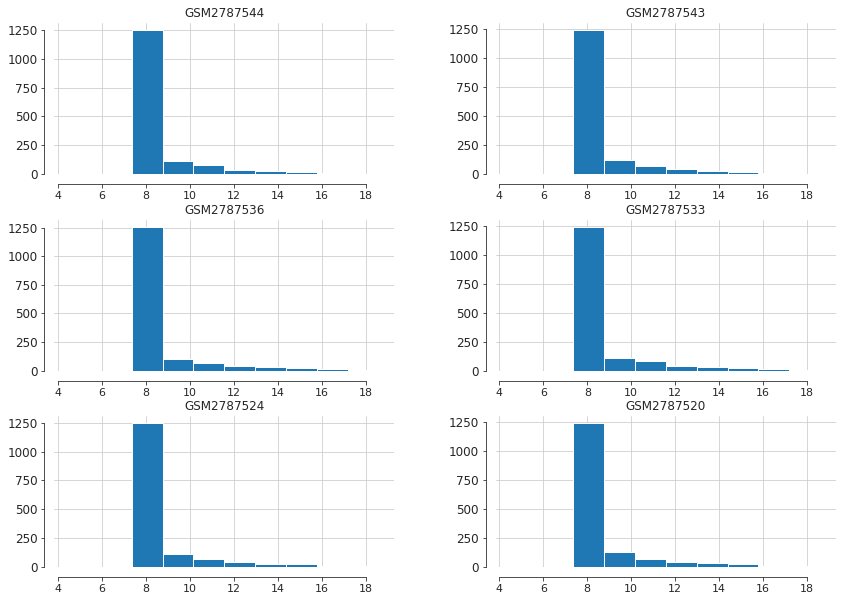

In [ ]:
pivoted_control_samples.hist()
sns.despine(offset=10, trim=True)

In [ ]:
gse.phenotype_data['characteristics_ch1.1.histology'].unique()

array(['PDTC', 'PTC', 'Non-neoplastic_thyroid', 'PDTC+PTC', 'PTC+PDTC',
       'PTC_lymph_node_metastasis', 'PDTC+ATC'], dtype=object)

In [ ]:
mirna_samples=gse.phenotype_data
mirna_samples_short=mirna_samples[['title','submission_date',	'last_update_date','characteristics_ch1.1.histology','characteristics_ch1.2.age','characteristics_ch1.3.Sex','extract_protocol_ch1','contact_name','contact_country']]

neoplasic_samples=mirna_samples_short[mirna_samples_short['characteristics_ch1.1.histology'].str.startswith('Non')==False]

In [ ]:
neoplasic_samples=neoplasic_samples[neoplasic_samples['title'].str.endswith('[miRNA]')]

In [ ]:
neoplasic=neoplasic_samples.index.tolist()
pivoted_neoplasic_samples = gse.pivot_samples('VALUE')[neoplasic]

Principais variáveis que gerei:
> *controls* - lista dos GSM dos controles

> *neoplasic* - lista dos GSM das amostras neoplasicas

> *neoplasic_samples* - lista das principais informações das amostras neoplasicas

> *non_neoplasic_samples* - lista das principais informações das amostras controle

> *pivoted_neoplasic_samples* - log2 da expressão dos miRNA nas amostras neoplasicas

> *pivoted_control_samples* - log2 da expressão dos miRNA nas amostras controle





In [ ]:
PDTC_GSM=neoplasic_samples[neoplasic_samples['characteristics_ch1.1.histology']=='PDTC'].index.tolist()
PTC_GSM=neoplasic_samples[neoplasic_samples['characteristics_ch1.1.histology']=='PTC'].index.tolist()
PTC_lymph_node_metastasis_GSM=neoplasic_samples[neoplasic_samples['characteristics_ch1.1.histology']=='PTC_lymph_node_metastasis'].index.tolist()
PTC_PDTC_GSM=["GSM2787534", "GSM2787522"]

Média e desvio padrão por categoria histológica:

In [ ]:
#PTC:
pivoted_PTC_samples = pivoted_neoplasic_samples[PTC_GSM]
pivoted_PTC_samples['Mean log2 expression']=pivoted_PTC_samples.mean(axis=1)
pivoted_PTC_samples['Standard Deviation log2 expression']=pivoted_PTC_samples.std(axis=1)
pivoted_PTC_samples_statistics=pivoted_PTC_samples[['Mean log2 expression','Standard Deviation log2 expression']].dropna()
pivoted_PTC_samples_statistics

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


name,Mean log2 expression,Standard Deviation log2 expression
ID_REF,,
Blank,4.561266,0.040983
NC1_00000197,7.938453,0.050343
NC1_00000215,8.180393,0.137782
NC2_00079215,7.808437,0.045208
NC2_00092197,7.937166,0.054361
...,...,...
hur_4,16.286339,1.166327
hur_5,11.060234,0.848892
hur_6,16.987595,0.439897


In [ ]:
#PDTC:
pivoted_PDTC_samples = pivoted_neoplasic_samples[PDTC_GSM]
pivoted_PDTC_samples['Mean log2 expression']=pivoted_PDTC_samples.mean(axis=1)
pivoted_PDTC_samples['Standard Deviation log2 expression']=pivoted_PDTC_samples.std(axis=1)
pivoted_PDTC_samples_statistics=pivoted_PDTC_samples[['Mean log2 expression','Standard Deviation log2 expression']].dropna()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#PTC_lymph_node_metastasis:
pivoted_PTC_lymph_node_metastasis_samples = pivoted_neoplasic_samples[PTC_lymph_node_metastasis_GSM]
pivoted_PTC_lymph_node_metastasis_samples['Mean log2 expression']=pivoted_PTC_lymph_node_metastasis_samples.mean(axis=1)
pivoted_PTC_lymph_node_metastasis_samples['Standard Deviation log2 expression']=pivoted_PTC_lymph_node_metastasis_samples.std(axis=1)
pivoted_PTC_lymph_node_metastasis_samples_statistics=pivoted_PTC_lymph_node_metastasis_samples[['Mean log2 expression','Standard Deviation log2 expression']].dropna()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#PTC+PDTC:
pivoted_PTC_PDTC_samples = pivoted_neoplasic_samples[PTC_PDTC_GSM]
pivoted_PTC_PDTC_samples['Mean log2 expression']=pivoted_PTC_PDTC_samples.mean(axis=1)
pivoted_PTC_PDTC_samples['Standard Deviation log2 expression']=pivoted_PTC_PDTC_samples.std(axis=1)
pivoted_PTC_PDTC_samples_statistics=pivoted_PTC_PDTC_samples[['Mean log2 expression','Standard Deviation log2 expression']].dropna()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Média e desvio padrão controle:

In [ ]:
#Controle:
pivoted_control_samples['Mean log2 expression']=pivoted_control_samples.mean(axis=1)
pivoted_control_samples['Standard Deviation log2 expression']=pivoted_control_samples.std(axis=1)
pivoted_control_samples_statistics=pivoted_control_samples[['Mean log2 expression','Standard Deviation log2 expression']].dropna()

Obtendo o log2FC

In [ ]:
#log2FC (PTC/Controle)
log2fc_ptc_control=pd.DataFrame(pivoted_control_samples_statistics['Mean log2 expression'] - pivoted_control_samples_statistics['Mean log2 expression'])
log2fc_ptc_control.columns=['log2FC (PTC/control)']
#log2FC (PDTC/Controle)
log2fc_pdtc_control=pd.DataFrame(pivoted_PDTC_samples_statistics['Mean log2 expression'] - pivoted_control_samples_statistics['Mean log2 expression'])
log2fc_pdtc_control.columns=['log2FC (PDTC/control)']
#log2FC (PTC_lymph_node_metastasis/Controle)
log2fc_PTC_lymph_node_metastasis_control=pd.DataFrame(pivoted_PTC_lymph_node_metastasis_samples_statistics['Mean log2 expression'] - pivoted_control_samples_statistics['Mean log2 expression'])
log2fc_PTC_lymph_node_metastasis_control.columns=['log2FC (PTC lymph node metastasis/control)']
#log2FC (PTC+PDTC/Controle)
log2fc_PTC_PDTC_control=pd.DataFrame(pivoted_PTC_PDTC_samples_statistics['Mean log2 expression'] - pivoted_control_samples_statistics['Mean log2 expression'])
log2fc_PTC_PDTC_control.columns=['log2FC (PTC+PDTC/control)']

Fazendo teste-t e p-ajustado:

In [ ]:
temp1=pivoted_neoplasic_samples[PTC_lymph_node_metastasis_GSM]
temp1=temp1[temp1.index.str.startswith('hsa')].dropna()
temp2=pivoted_control_samples[controls]
temp2=temp2[temp2.index.str.startswith('hsa')].dropna()
temp3=log2fc_PTC_lymph_node_metastasis_control

st, p = stats.ttest_ind(a=temp1,b=temp2, axis=1)
p_test=pd.DataFrame(data=p, index=temp1.index.tolist(), columns=['p-valor'])
b=pd.merge(temp3, p_test, how='outer', left_index=True, right_index=True )

a = statsmodels.stats.multitest.multipletests(pvals=p, method='fdr_bh')
p_test_adjusted=pd.DataFrame(data=a[1].tolist(), index=temp1.index.tolist(), columns=['p-valor ajustado'])

metastasis = pd.merge(b, p_test_adjusted, how='outer', left_index=True, right_index=True).drop_duplicates()
metastasis[metastasis['p-valor ajustado']<0.05].sort_values(by='log2FC (PTC lymph node metastasis/control)')

,log2FC (PTC lymph node metastasis/control),p-valor,p-valor ajustado
hsa-miR-199b-5p,-3.759097,2.205092e-06,0.001057
hsa-miR-204-5p,-3.312890,1.112399e-04,0.013007
hsa-miR-148a-3p,-2.267430,1.792872e-04,0.018168
hsa-miR-365a-3p,-2.209740,2.350719e-05,0.005908
hsa-miR-152,-2.209308,8.842969e-05,0.011201
hsa-miR-199a-3p,-2.185909,4.097478e-05,0.006920
hsa-miR-193b-3p,-1.729884,5.817028e-04,0.038837
hsa-miR-30c-5p,-1.574895,1.348359e-04,0.014639
hsa-miR-99a-5p,-1.401414,8.981569e-04,0.047076
hsa-miR-199a-5p,-1.248344,6.898614e-04,0.038837


#GSE113629

In [ ]:
#miRNA and gene expression profiling in human thyroid carcinomas and non-neoplastic thyroids:
gse = GEOparse.get_GEO(lista_gse[3])

24-Nov-2020 01:12:34 DEBUG utils - Directory ./ already exists. Skipping.
24-Nov-2020 01:12:34 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE113nnn/GSE113629/soft/GSE113629_family.soft.gz to ./GSE113629_family.soft.gz
100%|██████████| 160k/160k [00:00<00:00, 544kB/s] 
24-Nov-2020 01:12:35 DEBUG downloader - Size validation passed
24-Nov-2020 01:12:35 DEBUG downloader - Moving /tmp/tmp5thg7psk to /content/GSE113629_family.soft.gz
24-Nov-2020 01:12:35 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE113nnn/GSE113629/soft/GSE113629_family.soft.gz
24-Nov-2020 01:12:35 INFO GEOparse - Parsing ./GSE113629_family.soft.gz: 
24-Nov-2020 01:12:35 DEBUG GEOparse - DATABASE: GeoMiame
24-Nov-2020 01:12:35 DEBUG GEOparse - SERIES: GSE113629
24-Nov-2020 01:12:35 DEBUG GEOparse - PLATFORM: GPL24741
24-Nov-2020 01:12:35 DEBUG GEOparse - SAMPLE: GSM3110474
24-Nov-2020 01:12:35 DEBUG GEOparse - SAMPLE: GSM3110475
24-Nov-2020 01:12:35 DEBUG GEOpars

In [ ]:
gse.gpls['GPL24741'].columns

,description
ID,
gene_name,"LINK_PRE:""http://www.mirbase.org/cgi-bin/mirna..."
control_type,0: miRNA probes;1: positive control probes; -1...
SPOT_ID,


In [ ]:
gse.gsms["GSM3110479"].columns

,description
ID_REF,
VALUE,The log2 value of 90 percentile normalized value


In [ ]:
a=gse.phenotype_data.columns.tolist()
a[11]='Histological Type'
gse.phenotype_data.columns=a

In [ ]:
#Gerando a lista dos controles:
temp = gse.phenotype_data[["title", "Histological Type"]]
controls = temp[temp['Histological Type']=='normal thyroid tissue without tumor cell invasion'].index.tolist()

In [ ]:
pivoted_control_samples = gse.pivot_samples('VALUE')[controls]

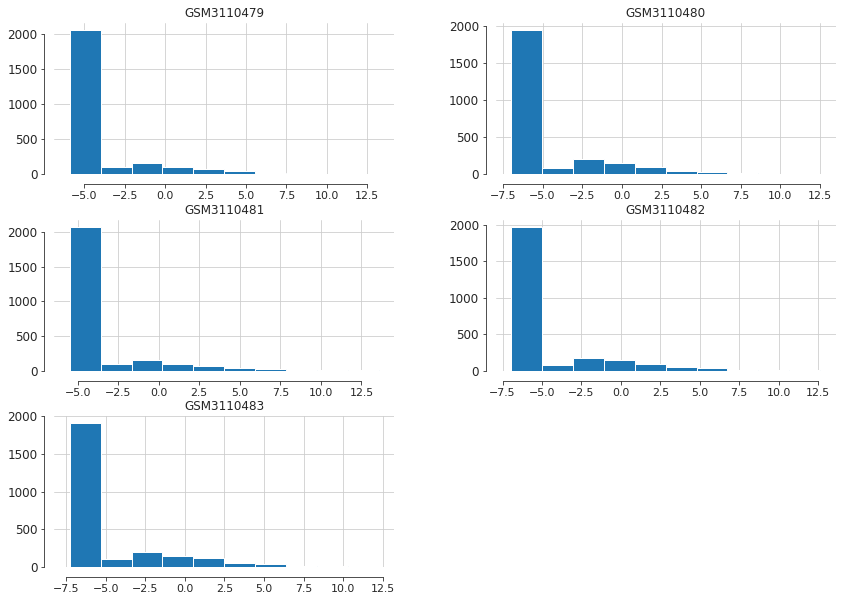

In [ ]:
pivoted_control_samples.hist()
sns.despine(offset=10, trim=True)

In [ ]:
neoplasic=['GSM3110474', 'GSM3110475', 'GSM3110476', 'GSM3110477', 'GSM3110478']
pivoted_neoplasic_samples = gse.pivot_samples('VALUE')[neoplasic]

In [ ]:
#histologia, idade, sexo, protocolo de extração, autor, país
temp=gse.phenotype_data[['submission_date','last_update_date','source_name_ch1', 'Histological Type','characteristics_ch1.2.gender','characteristics_ch1.3.age','contact_name','contact_country']]
neoplasic_samples=temp[temp['Histological Type']== 'papillary thyroid carcinoma']
non_neoplasic_samples=temp[temp['Histological Type']== 'normal thyroid tissue without tumor cell invasion']

Principais variáveis que gerei:
> *controls* - lista dos GSM dos controles

> *neoplasic* - lista dos GSM das amostras neoplasicas

> *neoplasic_samples* - lista das principais informações das amostras neoplasicas

> *non_neoplasic_samples* - lista das principais informações das amostras controle

> *pivoted_neoplasic_samples* - log2 da expressão dos miRNA nas amostras neoplasicas

> *pivoted_control_samples* - log2 da expressão dos miRNA nas amostras controle





Média e desvio padrão por categoria histológica:

In [ ]:
#PTC:
pivoted_neoplasic_samples = gse.pivot_samples('VALUE')[neoplasic]
pivoted_neoplasic_samples['Mean log2 expression']=pivoted_neoplasic_samples.mean(axis=1)
pivoted_neoplasic_samples['Standard Deviation log2 expression']=pivoted_neoplasic_samples.std(axis=1)
pivoted_neoplasic_samples_statistics=pivoted_neoplasic_samples[['Mean log2 expression','Standard Deviation log2 expression']].dropna()

Média e desvio padrão controle:

In [ ]:
#Controle:
gse_control = GEOparse.get_GEO(lista_gse[3])

pivoted_controls_samples = gse_control.pivot_samples('VALUE')[controls]
pivoted_controls_samples['Mean log2 expression']=pivoted_controls_samples.mean(axis=1)
pivoted_controls_samples['Standard Deviation log2 expression']=pivoted_controls_samples.std(axis=1)
pivoted_controls_samples_statistics=pivoted_controls_samples[['Mean log2 expression','Standard Deviation log2 expression']].dropna()

24-Nov-2020 01:12:36 DEBUG utils - Directory ./ already exists. Skipping.
24-Nov-2020 01:12:36 INFO GEOparse - File already exist: using local version.
24-Nov-2020 01:12:36 INFO GEOparse - Parsing ./GSE113629_family.soft.gz: 
24-Nov-2020 01:12:36 DEBUG GEOparse - DATABASE: GeoMiame
24-Nov-2020 01:12:36 DEBUG GEOparse - SERIES: GSE113629
24-Nov-2020 01:12:36 DEBUG GEOparse - PLATFORM: GPL24741
24-Nov-2020 01:12:37 DEBUG GEOparse - SAMPLE: GSM3110474
24-Nov-2020 01:12:37 DEBUG GEOparse - SAMPLE: GSM3110475
24-Nov-2020 01:12:37 DEBUG GEOparse - SAMPLE: GSM3110476
24-Nov-2020 01:12:37 DEBUG GEOparse - SAMPLE: GSM3110477
24-Nov-2020 01:12:37 DEBUG GEOparse - SAMPLE: GSM3110478
24-Nov-2020 01:12:37 DEBUG GEOparse - SAMPLE: GSM3110479
24-Nov-2020 01:12:37 DEBUG GEOparse - SAMPLE: GSM3110480
24-Nov-2020 01:12:37 DEBUG GEOparse - SAMPLE: GSM3110481
24-Nov-2020 01:12:37 DEBUG GEOparse - SAMPLE: GSM3110482
24-Nov-2020 01:12:37 DEBUG GEOparse - SAMPLE: GSM3110483


Obtendo o log2FC

In [ ]:
#log2FC (PTC/Controle)
log2fc_ptc_control=pd.DataFrame(pivoted_neoplasic_samples_statistics['Mean log2 expression'] - pivoted_controls_samples_statistics['Mean log2 expression'])
log2fc_ptc_control.columns=['log2FC (PTC/control)']

Tabelando os up e down regulated miR:

In [ ]:
#PTC:
miR_upregulated_PTC=log2fc_ptc_control[log2fc_ptc_control>float(log2fc_ptc_control.quantile(0.975))].dropna()
miR_downregulated_PTC=log2fc_ptc_control[log2fc_ptc_control<float(log2fc_ptc_control.quantile(0.025))].dropna()

T-test:

In [ ]:
#sts.multitest.multipletests()
st, p = stats.ttest_ind(a=pivoted_controls_samples[['GSM3110479', 'GSM3110480', 'GSM3110481', 'GSM3110482', 'GSM3110483']],b=pivoted_neoplasic_samples[['GSM3110474', 'GSM3110475', 'GSM3110476', 'GSM3110477', 'GSM3110478']], axis=1)
p_test=pd.DataFrame(data=p, index=pivoted_controls_samples.index.tolist(), columns=['p-valor'])
a = statsmodels.stats.multitest.multipletests(pvals=p, method='fdr_bh')
p_test_adjusted=pd.DataFrame(data=a[1].tolist(), index=pivoted_controls_samples.index.tolist(), columns=['p-valor ajustado'])

Final:

In [ ]:
miR_PTC=pd.concat([miR_upregulated_PTC, miR_downregulated_PTC])
miR_PTC=pd.merge(miR_PTC, p_test, how='inner', left_index=True, right_index=True)
miR_PTC=pd.merge(miR_PTC, p_test_adjusted, how='inner', left_index=True, right_index=True)
miR_PTC.sort_values(by='log2FC (PTC/control)')

,log2FC (PTC/control),p-valor,p-valor ajustado
hsa-miR-5703,-5.698466,1.282260e-05,0.001498
hsa-miR-630,-5.338855,2.234988e-04,0.009885
hsa-miR-718,-4.687811,3.646731e-05,0.003023
hsa-miR-4646-5p,-4.157638,4.025336e-06,0.000862
hsa-miR-6794-5p,-4.119376,2.008304e-07,0.000172
...,...,...,...
hsa-miR-31-3p,5.399298,2.299985e-04,0.009885
hsa-miR-146b-3p,5.540764,1.341705e-06,0.000493
hsa-miR-375,5.962675,3.149803e-03,0.018384
hsa-miR-551b-3p,6.340525,2.505171e-04,0.010220


#GSE129878

In [ ]:
#miRNA and gene expression profiling in human thyroid carcinomas and non-neoplastic thyroids:
gse = GEOparse.get_GEO(lista_gse[6])

27-Nov-2020 13:37:21 DEBUG utils - Directory ./ already exists. Skipping.
27-Nov-2020 13:37:21 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE129nnn/GSE129878/soft/GSE129878_family.soft.gz to ./GSE129878_family.soft.gz
100%|██████████| 18.8M/18.8M [00:01<00:00, 12.5MB/s]
27-Nov-2020 13:37:23 DEBUG downloader - Size validation passed
27-Nov-2020 13:37:23 DEBUG downloader - Moving /tmp/tmpgm9m0yqb to /content/GSE129878_family.soft.gz
27-Nov-2020 13:37:23 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE129nnn/GSE129878/soft/GSE129878_family.soft.gz
27-Nov-2020 13:37:23 INFO GEOparse - Parsing ./GSE129878_family.soft.gz: 
27-Nov-2020 13:37:23 DEBUG GEOparse - DATABASE: GeoMiame
27-Nov-2020 13:37:23 DEBUG GEOparse - SERIES: GSE129878
27-Nov-2020 13:37:23 DEBUG GEOparse - PLATFORM: GPL19117
/usr/local/lib/python3.6/dist-packages/GEOparse/GEOparse.py:110: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set 

In [ ]:
gse.gpls['GPL19117'].columns

,description
ID,Probe Set Name
Probe Set ID,
Accession,
Transcript ID(Array Design),
Sequence Type,
Species Scientific Name,
Alignments,
Sequence Length,
Sequence,
Genome Context,


In [ ]:
gse.gsms["GSM3723850"].columns

,description
ID_REF,
VALUE,RMA


In [ ]:
gse.phenotype_data['source_name_ch1'].unique()

array(['PTC-non-aggressive', 'PTC-invasive', 'PTC-metastatic'],
      dtype=object)

In [ ]:
#histologia, idade, sexo, protocolo de extração, autor, país
gse.phenotype_data.columns
neoplasic_samples=gse.phenotype_data[['submission_date','last_update_date','source_name_ch1','characteristics_ch1.2.age','characteristics_ch1.3.gender','contact_name','contact_country']]

In [ ]:
temp=gse.gpls['GPL19117'].table.sort_values(by='ID').reset_index(drop=True)

In [ ]:
gse.pivot_samples('VALUE').index[0]==temp['ID'][0]

True

In [ ]:
lista=temp['miRNA_ID'].tolist()
df=gse.pivot_samples('VALUE')
df['miRNA_ID']=lista
pivoted_neoplasic_samples=df.dropna().set_index('miRNA_ID', drop=True)

Principais variáveis que gerei:
> *neoplasic_samples* - lista das principais informações das amostras neoplasicas

> *pivoted_neoplasic_samples* - log2 da expressão dos miRNA nas amostras neoplasicas





In [ ]:
PTC_non_aggressive_GSM=neoplasic_samples[neoplasic_samples['source_name_ch1']=='PTC-non-aggressive'].index.tolist()
PTC_invasive_GSM=neoplasic_samples[neoplasic_samples['source_name_ch1']=='PTC-invasive'].index.tolist()
PTC_metastatic_GSM=neoplasic_samples[neoplasic_samples['source_name_ch1']=='PTC-metastatic'].index.tolist()

Média e desvio padrão por categoria histológica:

In [ ]:
#PTC_non_aggressive:
pivoted_PTC_non_aggressive_samples=pivoted_neoplasic_samples[PTC_non_aggressive_GSM]
pivoted_PTC_non_aggressive_samples['Mean log2 expression']=pivoted_PTC_non_aggressive_samples.mean(axis=1)
pivoted_PTC_non_aggressive_samples['Standard Deviation log2 expression']=pivoted_PTC_non_aggressive_samples.std(axis=1)
pivoted_PTC_non_aggressive_samples_statistics=pivoted_PTC_non_aggressive_samples[['Mean log2 expression','Standard Deviation log2 expression']].dropna()
pivoted_PTC_non_aggressive_samples_statistics.sort_values(by='Mean log2 expression')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


name,Mean log2 expression,Standard Deviation log2 expression
miRNA_ID,,
osa-miR156j-3p,1.020467,0.071783
crm-miR-80-5p,1.023167,0.055216
pma-miR-4542-3p,1.023700,0.116331
mmu-miR-6907-3p,1.025600,0.149795
tca-miR-3847-5p,1.026600,0.007010
...,...,...
tni-miR-26,13.037733,0.396466
oar-miR-26a,13.037733,0.396466
hsa-miR-26a-5p,13.037733,0.396466


In [ ]:
#PTC_invasive:
pivoted_PTC_invasive_samples = pivoted_neoplasic_samples[PTC_invasive_GSM]
pivoted_PTC_invasive_samples['Mean log2 expression']=pivoted_PTC_invasive_samples.mean(axis=1)
pivoted_PTC_invasive_samples['Standard Deviation log2 expression']=pivoted_PTC_invasive_samples.std(axis=1)
pivoted_PTC_invasive_samples_statistics=pivoted_PTC_invasive_samples[['Mean log2 expression','Standard Deviation log2 expression']].dropna()
pivoted_PTC_invasive_samples_statistics.sort_values(by='Mean log2 expression')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


name,Mean log2 expression,Standard Deviation log2 expression
miRNA_ID,,
mmu-miR-3081-3p,0.983967,0.057963
hsa-miR-6733-3p,0.998133,0.087646
dme-miR-985-5p,1.024533,0.094805
cqu-bantam-5p,1.067033,0.097392
aae-bantam-5p,1.067033,0.097392
...,...,...
mml-miR-125b-5p,13.036133,0.005436
tgu-miR-125-5p,13.036133,0.005436
mdo-miR-125b-5p,13.036133,0.005436


In [ ]:
#PTC_metastatic:
pivoted_PTC_metastatic_samples = pivoted_neoplasic_samples[PTC_metastatic_GSM]
pivoted_PTC_metastatic_samples['Mean log2 expression']=pivoted_PTC_metastatic_samples.mean(axis=1)
pivoted_PTC_metastatic_samples['Standard Deviation log2 expression']=pivoted_PTC_metastatic_samples.std(axis=1)
pivoted_PTC_metastatic_samples_statistics=pivoted_PTC_metastatic_samples[['Mean log2 expression','Standard Deviation log2 expression']].dropna()
pivoted_PTC_metastatic_samples_statistics.sort_values(by='Mean log2 expression')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


name,Mean log2 expression,Standard Deviation log2 expression
miRNA_ID,,
oan-miR-32-3p,0.883600,0.103418
aca-miR-32-3p,0.883600,0.103418
mmu-miR-544-3p,0.907100,0.122025
ghr-miR7495a,0.919833,0.071755
ghr-miR7495b,0.919833,0.071755
...,...,...
ipu-miR-221,13.233333,0.178440
cfa-miR-221,13.233333,0.178440
aca-miR-221-3p,13.233333,0.178440


log2FC:

In [ ]:
#log2FC (PTC_invasive/PTC_non_aggressive)
log2fc_PTC_invasive_against_PTC_non_aggressive=pd.DataFrame(pivoted_PTC_invasive_samples['Mean log2 expression'] - pivoted_PTC_non_aggressive_samples['Mean log2 expression'])
log2fc_PTC_invasive_against_PTC_non_aggressive.columns=['log2FC (PTC_invasive/PTC_non_aggressive)']
log2fc_PTC_invasive_against_PTC_non_aggressive=log2fc_PTC_invasive_against_PTC_non_aggressive[log2fc_PTC_invasive_against_PTC_non_aggressive.index.str.startswith('hsa')]
#log2FC (PTC_metastatic/PTC_non_aggressive)
log2fc_PTC_metastatic_against_PTC_non_aggressive=pd.DataFrame(pivoted_PTC_metastatic_samples['Mean log2 expression'] - pivoted_PTC_non_aggressive_samples['Mean log2 expression'])
log2fc_PTC_metastatic_against_PTC_non_aggressive.columns=['log2FC (PTC_metastatic/PTC_non_aggressive)']
log2fc_PTC_metastatic_against_PTC_non_aggressive=log2fc_PTC_metastatic_against_PTC_non_aggressive[log2fc_PTC_metastatic_against_PTC_non_aggressive.index.str.startswith('hsa')]
#log2FC (PTC_metastatic/PTC_invasive)
log2fc_PTC_metastatic_against_PTC_invasive=pd.DataFrame(pivoted_PTC_metastatic_samples['Mean log2 expression'] - pivoted_PTC_invasive_samples['Mean log2 expression'])
log2fc_PTC_metastatic_against_PTC_invasive.columns=['log2FC (PTC_metastatic/PTC_invasive)']
log2fc_PTC_metastatic_against_PTC_invasive=log2fc_PTC_metastatic_against_PTC_invasive[log2fc_PTC_metastatic_against_PTC_invasive.index.str.startswith('hsa')]

In [ ]:
log2fc_PTC_metastatic_against_PTC_non_aggressive

,log2FC (PTC_metastatic/PTC_non_aggressive)
miRNA_ID,
hsa-let-7a-1,-0.206867
hsa-let-7a-1,-0.206867
hsa-let-7a-2,-0.060000
hsa-let-7a-3,-0.231433
hsa-let-7b,-0.126367
...,...
hsa-miR-7974,-0.383567
hsa-miR-7975,0.681133
hsa-miR-7976,-0.383933


In [ ]:
#Thyroid_primary_tumor/Controle Teste-t:
temp1=pivoted_neoplasic_samples[PTC_metastatic_GSM].dropna()
temp1=temp1[temp1.index.str.startswith('hsa')]
temp2=pivoted_neoplasic_samples[PTC_non_aggressive_GSM].dropna()
temp2=temp2[temp2.index.str.startswith('hsa')]
temp3=log2fc_PTC_metastatic_against_PTC_non_aggressive

st, p = stats.ttest_ind(a=temp1,b=temp2, axis=1)
p_test=pd.DataFrame(data=p, index=temp1.index.tolist(), columns=['p-valor'])
b=pd.merge(temp3, p_test, how='outer', left_index=True, right_index=True )

a = statsmodels.stats.multitest.multipletests(pvals=p, method='fdr_bh')
p_test_adjusted=pd.DataFrame(data=a[1].tolist(), index=temp1.index.tolist(), columns=['p-valor ajustado'])

metastasis = pd.merge(b, p_test_adjusted, how='outer', left_index=True, right_index=True).drop_duplicates()
metastasis.sort_values(by='p-valor ajustado')

,log2FC (PTC_metastatic/PTC_non_aggressive),p-valor,p-valor ajustado
hsa-mir-649,-0.388900,0.000160,0.738749
hsa-let-7a-1,-0.206867,0.265988,0.908373
hsa-mir-1908,-0.224767,0.340779,0.908373
hsa-mir-1909,0.335000,0.278842,0.908373
hsa-mir-190a,-0.543333,0.022309,0.908373
...,...,...,...
hsa-mir-6076,-0.000067,0.999425,0.999857
hsa-mir-4483,-0.000267,0.999267,0.999857
hsa-miR-10b-5p,-0.000233,0.999547,0.999857
hsa-miR-3591-5p,0.000133,0.999639,0.999857


#GSE15740 (ainda não arrumei todo)

In [ ]:
#miRNA and gene expression profiling in human thyroid carcinomas and non-neoplastic thyroids:
gse = GEOparse.get_GEO(lista_gse[14])

23-Nov-2020 16:19:26 DEBUG utils - Directory ./ already exists. Skipping.
23-Nov-2020 16:19:26 INFO GEOparse - File already exist: using local version.
23-Nov-2020 16:19:26 INFO GEOparse - Parsing ./GSE15740_family.soft.gz: 
23-Nov-2020 16:19:26 DEBUG GEOparse - DATABASE: GeoMiame
23-Nov-2020 16:19:26 DEBUG GEOparse - SERIES: GSE15740
23-Nov-2020 16:19:26 DEBUG GEOparse - PLATFORM: GPL4717
23-Nov-2020 16:19:26 DEBUG GEOparse - SAMPLE: GSM402561
23-Nov-2020 16:19:26 DEBUG GEOparse - SAMPLE: GSM402562
23-Nov-2020 16:19:26 DEBUG GEOparse - SAMPLE: GSM402563
23-Nov-2020 16:19:26 DEBUG GEOparse - SAMPLE: GSM402564
23-Nov-2020 16:19:26 DEBUG GEOparse - SAMPLE: GSM402565
23-Nov-2020 16:19:26 DEBUG GEOparse - SAMPLE: GSM402566
23-Nov-2020 16:19:26 DEBUG GEOparse - SAMPLE: GSM402567
23-Nov-2020 16:19:26 DEBUG GEOparse - SAMPLE: GSM402568
23-Nov-2020 16:19:26 DEBUG GEOparse - SAMPLE: GSM402569
23-Nov-2020 16:19:26 DEBUG GEOparse - SAMPLE: GSM402570
23-Nov-2020 16:19:26 DEBUG GEOparse - SAMPLE: G

In [ ]:
lista_mir=gse.gpls['GPL4717'].table['CLONE_ID'].tolist()
for i in range(len(lista_mir)):
  if type(lista_mir[i])==str:
    lista_mir[i]=lista_mir[i].lower()

In [ ]:
gse.gsms["GSM402648"].columns

,description
ID_REF,
VALUE,normalized log2(635/532) per feature (processe...


In [ ]:
gse.phenotype_data

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,characteristics_ch1.0.label,characteristics_ch1.1.extract,characteristics_ch1.2.sample,characteristics_ch1.3.subject,characteristics_ch1.4.tissue,characteristics_ch1.5.disease,characteristics_ch1.6.rna_number,characteristics_ch1.7.extract_amount,characteristics_ch1.8.extract_concentration,molecule_ch1,extract_protocol_ch1,label_ch1,label_protocol_ch1,source_name_ch2,organism_ch2,taxid_ch2,characteristics_ch2.0.label,characteristics_ch2.1.extract,characteristics_ch2.2.sample,characteristics_ch2.3.subject,characteristics_ch2.4.tissue,characteristics_ch2.5.disease,characteristics_ch2.6.rna_number,characteristics_ch2.7.extract_amount,characteristics_ch2.8.extract_concentration,molecule_ch2,extract_protocol_ch2,label_ch2,label_protocol_ch2,hyb_protocol,scan_protocol,description,data_processing,platform_id,contact_name,contact_laboratory,contact_institute,contact_address,contact_city,contact_zip/postal_code,contact_country,supplementary_file,series_id,data_row_count,characteristics_ch1.5.origin,characteristics_ch1.6.disease,characteristics_ch1.7.rna_number,characteristics_ch1.8.extract_amount,characteristics_ch1.9.extract_concentration,characteristics_ch2.5.origin,characteristics_ch2.6.disease,characteristics_ch2.7.rna_number,characteristics_ch2.8.extract_amount,characteristics_ch2.9.extract_concentration
GSM402561,FT-UMP LB05-329 312107,GSM402561,Public on Aug 22 2011,May 13 2009,Aug 23 2011,other,2,FT-UMP.3L,Homo sapiens,9606,FT-UMP.3L,FT-UMP.3L,FT-UMP.3L,LB05-329,Thyroid,lesional (FTUMP),6,3.94,84.0,other,MirVana,Cy3,Invitrogen - Ulysis,FT-UMP.3S,Homo sapiens,9606,FT-UMP.3S,FT-UMP.3S,FT-UMP.3S,LB05-329,Thyroid,safe (FTUMP),6,9.68,206.0,other,MirVana,Cy5,Invitrogen - Ulysis,Agilent : 700.0 ng at 48 degree_C during 17 hours,Scanned on an GenePix 4000B fluorescent scanne...,"FT-UMP.3L vs FT-UMP.3S,Date:2007/05/09","Interslide norm. : vsn, Intraslide norm. : non...",GPL4717,"Kevin,,Lebrigand",Functional Genomics Platform of Nice-Sophia-An...,IPMC/CNRS,660 route des lucioles,Valbonne - Sophia-Antipolis,06560,France,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM402n...,GSE15740,10752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM402562,C-PTC-mut LB06-190 312186,GSM402562,Public on Aug 22 2011,May 13 2009,Aug 23 2011,other,2,C-PTC-mut.3S,Homo sapiens,9606,C-PTC-mut.3S,C-PTC-mut.3S,C-PTC-mut.3S,LB06-190,Thyroid,safe (CPTC-mut),6,8.6,184.0,other,MirVana,Cy3,Invitrogen - Ulysis,C-PTC-mut.3L,Homo sapiens,9606,C-PTC-mut.3L,C-PTC-mut.3L,C-PTC-mut.3L,LB06-190,Thyroid,lesional (CPTC-mut),6,4.65,99.0,other,MirVana,Cy5,Invitrogen - Ulysis,Agilent : 700.0 ng at 48 degree_C during 17 hours,Scanned on an GenePix 4000B fluorescent scanne...,"C-PTC-mut.3S vs C-PTC-mut.3L,Date:2007/05/09","Interslide norm. : vsn, Intraslide norm. : non...",GPL4717,"Kevin,,Lebrigand",Functional Genomics Platform of Nice-Sophia-An...,IPMC/CNRS,660 route des lucioles,Valbonne - Sophia-Antipolis,06560,France,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM402n...,GSE15740,10752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM402563,WDT-UMP LB05-473 312110,GSM402563,Public on Aug 22 2011,May 13 2009,Aug 23 2011,other,2,WDT-UMP.3S,Homo sapiens,9606,WDT-UMP.3S,WDT-UMP.3S,WDT-UMP.3S,LB05-473,Thyroid,safe (WDTUMP),6,5.79,126.0,other,MirVana,Cy3,Invitrogen - Ulysis,WDT-UMP.3L,Homo sapiens,9606,WDT-UMP.3L,WDT-UMP.3L,WDT-UMP.3L,LB05-473,Thyroid,lesional (WDTUMP),6,7.59,165.0,other,MirVana,Cy5,Invitrogen - Ulysis,Agilent : 700.0 ng at 48 degree_C during 17 hours,Scanned on an GenePix 4000B fluorescent scanne...,"WDT-UMP.3S vs WDT-UMP.3L,Date:2007/05/09","Interslide norm. : vsn, Intraslide norm. : non...",GPL4717,"Kevin,,Lebrigand",Functional Genomics Platform of Nice-Sophia-An...,IPMC/CNRS,660 route des lucioles,Valbonne - Sophia-Antipolis,06560,France,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM402n...,GSE15740,10752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM402564,ADENOMA LB06-174 

In [ ]:
gse.pivot_samples('VALUE')

name,GSM402561,GSM402562,GSM402563,GSM402564,GSM402565,GSM402566,GSM402567,GSM402568,GSM402569,GSM402570,GSM402571,GSM402572,GSM402573,GSM402574,GSM402575,GSM402576,GSM402577,GSM402578,GSM402579,GSM402580,GSM402581,GSM402582,GSM402583,GSM402584,GSM402585,GSM402586,GSM402587,GSM402588,GSM402589,GSM402590,GSM402591,GSM402592,GSM402593,GSM402594,GSM402595,GSM402596,GSM402597,GSM402598,GSM402599,GSM402600,...,GSM402610,GSM402611,GSM402612,GSM402613,GSM402614,GSM402615,GSM402616,GSM402617,GSM402618,GSM402619,GSM402620,GSM402621,GSM402622,GSM402623,GSM402624,GSM402625,GSM402626,GSM402627,GSM402628,GSM402629,GSM402630,GSM402631,GSM402632,GSM402633,GSM402634,GSM402635,GSM402636,GSM402637,GSM402638,GSM402639,GSM402640,GSM402641,GSM402642,GSM402643,GSM402644,GSM402645,GSM402646,GSM402647,GSM402648,GSM402649
ID_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.826280,0.372780,0.227878,-0.127686,0.545149,0.116726,-0.015775,0.055961,-0.624390,-0.348018,0.268232,-0.902839,0.399092,-0.512581,0.634812,-0.213687,-0.018328,0.471939,-1.024680,0.292071,0.044099,-0.616824,0.295254,-1.439280,0.236908,0.623207,-0.721146,-0.305859,-0.103888,0.453508,-0.652760,0.278508,-0.392145,-0.632639,-0.779340,-0.332916,-0.232902,-0.691643,-0.032373,0.840940,...,-0.731964,-0.218370,0.861676,-0.906016,-1.290508,0.232351,-0.326895,-0.182820,1.114953,-0.385937,0.269168,-0.496589,-0.512004,0.459359,-1.358390,-0.930491,0.179222,-0.082130,0.130971,0.196801,1.635576,-0.231058,-0.220003,-0.574421,-0.516228,0.080630,-0.196052,-0.340103,-0.297010,-0.285794,-0.784196,0.352322,-0.439672,0.039541,0.341624,0.273856,-0.212793,-0.699948,0.251701,-0.094344
2,-0.965819,0.407742,0.141976,-0.147391,0.442416,0.127577,-0.132429,-0.105158,-0.526026,-0.341170,0.164763,-0.693758,0.312480,-0.443637,0.903423,-0.218871,-0.357640,0.358583,-1.040500,0.397662,0.082353,-0.501063,0.090246,-1.312020,0.161453,0.710843,-0.468023,-0.128131,-0.322070,0.293664,-0.992445,0.219714,-0.206475,-0.469640,-0.695777,-0.325373,-0.137581,-0.221473,-0.061398,0.886524,...,-0.861157,-0.132764,-0.630982,-0.746952,-0.822708,0.186234,-0.713701,-0.357802,1.006501,-0.741298,0.191811,-0.033445,-0.534203,0.504156,-1.377700,-0.890798,-0.125765,0.071219,-0.077057,0.206899,0.743556,-0.161495,-0.042056,-0.658141,-0.678409,0.447986,0.422207,-0.452642,-0.331503,-0.277352,-0.727299,0.230493,-0.586749,0.101705,0.215715,0.546395,-0.302580,-0.629116,-0.710301,-0.331817
3,0.419814,0.196430,-0.450215,-0.105842,0.064502,0.068400,0.065263,-0.269013,-0.093908,0.073401,0.013197,0.227153,-0.168574,-0.887262,-0.071116,-0.376638,0.032307,0.210580,0.604931,0.294361,0.580707,0.556102,0.439131,0.166830,-0.762927,-0.060400,0.187037,0.500272,-0.502431,-0.095262,0.168012,0.328101,0.573532,0.397746,-0.116303,-0.502298,-0.096053,-0.479792,-0.347193,-0.450217,...,0.801513,-0.389689,0.606572,0.577702,0.416440,0.126097,0.200731,-0.352619,-0.118791,0.617213,-0.107943,0.511283,-0.167178,0.646933,-0.077847,-0.056413,-0.834637,0.633290,0.192175,-0.298063,-0.442821,0.142871,0.530825,0.396782,0.412327,0.251465,-0.030548,0.786122,0.055104,0.318970,0.579436,-1.026362,0.350484,-0.620858,-0.367229,0.786718,0.651675,0.577669,-0.547741,-0.345630
4,0.300153,0.244115,-0.450748,-0.254218,-0.413838,-0.162724,-0.335300,-0.219537,-0.026442,0.282611,0.087655,0.248652,-0.153714,-0.080528,0.090068,-0.207528,0.690641,0.549116,0.778902,0.335018,0.567352,0.289260,0.465819,-0.109468,0.315137,-0.179508,0.085703,0.587710,-0.755417,-0.130210,0.097283,0.074518,0.065075,0.353326,-0.834232,-0.481190,-0.028357,0.056288,-0.047491,-0.417210,...,0.797349,-0.548884,0.628878,0.941790,0.449847,0.196249,0.158890,-0.182752,-0.158577,0.492244,-0.138042,0.620463,0.475582,0.380889,-0.194073,-0.294624,-0.298123,0.501320,0.064772,-0.341105,-0.232038,0.298186,0.683215,0.277368,0.360618,0.138003,-0.029814,0.401743,0.405205,0.502445,0.634461,-0.980254,0.731237,-0.336258,-0.402809,0.800196,0.484678,0.661290,-0.455553,-0.602134
5,0.535959,-0.357862,-0.751287,0

In [ ]:
#Gerando a lista dos controles (safe adenoma):

controls = gse.phenotype_data['characteristics_ch1.5.disease'][gse.phenotype_data['characteristics_ch1.5.disease']=='safe (adenoma)'].index.tolist()
neoplasic_samples = gse.phenotype_data['characteristics_ch1.5.disease'][gse.phenotype_data['characteristics_ch1.5.disease']!='safe (adenoma)'].index.tolist()

In [ ]:
temp=gse.gpls['GPL4717'].table.sort_values(by='ID')
lista=temp['CLONE_ID'].tolist()
df=gse.pivot_samples('VALUE')
df['miRNA_ID']=lista
pivoted_samples=df.dropna().set_index('miRNA_ID', drop=True)

In [ ]:
pivoted_control_samples = pivoted_samples[controls]
pivoted_control_samples

name,GSM402564,GSM402600,GSM402603,GSM402608,GSM402617,GSM402620,GSM402648,GSM402649
miRNA_ID,,,,,,,,
mir-234,-0.117177,-0.200419,0.079632,0.436617,-0.098053,-0.053954,-0.012811,0.094082
mir-234,-0.076474,-0.481128,0.105215,0.455036,-0.335615,0.172023,0.055914,0.050871
mir-431,-0.136011,-0.973204,-0.097124,0.579498,-0.290873,-0.269819,-0.209102,-0.291549
mir-431,0.241659,-0.643532,-0.468084,0.954822,-0.398411,-0.097280,0.159849,-0.292864
mir-250,-0.086110,-0.295500,-0.149777,0.276640,-0.272018,0.217258,-0.234626,-0.090054
...,...,...,...,...,...,...,...,...
mir-425-s,-0.145456,-1.197574,-0.327634,-1.081797,-0.213422,-0.432983,-0.375851,-0.166329
mir-346-s,-0.295531,1.307488,-0.079328,-1.236696,0.186089,-0.687168,-0.664137,-0.661613
mir-346-s,-0.343222,-0.967478,-0.132921,-0.880886,0.497019,-0.526796,-0.610864,-0.846479


In [ ]:
pivoted_neoplasic_samples = pivoted_samples[neoplasic_samples]
pivoted_neoplasic_samples

name,GSM402561,GSM402562,GSM402563,GSM402565,GSM402566,GSM402567,GSM402568,GSM402569,GSM402570,GSM402571,GSM402572,GSM402573,GSM402574,GSM402575,GSM402576,GSM402577,GSM402578,GSM402579,GSM402580,GSM402581,GSM402582,GSM402583,GSM402584,GSM402585,GSM402586,GSM402587,GSM402588,GSM402589,GSM402590,GSM402591,GSM402592,GSM402593,GSM402594,GSM402595,GSM402596,GSM402597,GSM402598,GSM402599,GSM402601,GSM402602,...,GSM402605,GSM402606,GSM402607,GSM402609,GSM402610,GSM402611,GSM402612,GSM402613,GSM402614,GSM402615,GSM402616,GSM402618,GSM402619,GSM402621,GSM402622,GSM402623,GSM402624,GSM402625,GSM402626,GSM402627,GSM402628,GSM402629,GSM402630,GSM402631,GSM402632,GSM402633,GSM402634,GSM402635,GSM402636,GSM402637,GSM402638,GSM402639,GSM402640,GSM402641,GSM402642,GSM402643,GSM402644,GSM402645,GSM402646,GSM402647
miRNA_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mir-234,-0.073704,0.586082,-0.093485,0.206665,-0.097064,-0.471344,0.055883,-0.099419,0.090479,0.440276,-0.131908,0.101728,-0.321084,0.084570,0.164040,0.462665,0.755530,0.334906,-0.464274,0.168239,0.492470,0.710507,0.321253,0.078420,-0.157060,0.973208,0.160823,0.464208,0.065434,-0.059021,0.352204,-0.031929,0.112525,-0.164125,-0.696801,0.020240,0.003684,0.269375,0.025150,0.485296,...,0.494094,0.410816,0.046297,0.611797,0.843875,-0.057626,0.426534,0.545912,0.542939,0.447446,-0.689160,0.167261,0.923362,0.324073,-0.595400,0.930512,-0.210312,0.188054,-0.002445,1.031293,0.282798,-0.063510,0.053135,-0.092870,0.194903,0.159530,0.255093,-0.201224,1.526760,1.090896,1.021104,0.927467,0.364532,-0.383641,0.099652,-0.049023,-0.062696,0.223025,0.181003,0.091899
mir-234,-0.045409,0.611138,-1.202325,0.490259,-0.275039,-0.601972,0.415999,-0.303042,-0.018620,0.382421,-0.102170,0.114651,-0.085999,0.219368,0.122184,0.460499,0.961201,0.358723,-0.595389,0.134124,0.346930,0.664207,0.151356,0.004173,-0.035540,0.915645,0.359354,0.475134,0.160962,0.030609,0.170097,0.145715,0.225489,-0.071117,-0.632351,0.081081,-0.044385,0.381104,0.013774,0.393731,...,0.468708,0.298725,0.175694,0.783022,0.240712,-0.179803,0.418933,0.581392,0.391545,0.373685,0.539416,0.182424,0.578227,0.470984,0.950922,1.003937,-0.267274,0.391717,-0.031007,1.241446,0.387411,-0.260746,-0.025371,0.040209,0.200479,0.213900,0.215342,-0.377743,0.253618,1.224459,1.182006,0.964691,0.363953,-0.337065,0.016843,-0.087160,0.012214,0.602125,0.328844,0.405706
mir-431,-0.585217,0.191042,-0.356580,0.214747,-0.164745,-0.430971,-0.010985,-0.142960,-0.011202,0.168757,0.023065,0.013212,-0.157873,-0.561755,-0.329709,0.395637,0.442182,0.578713,-0.560739,-0.090922,0.418367,0.417572,0.530820,-0.225762,-0.091709,0.942739,0.290284,0.388612,-0.056182,-0.049204,0.020462,0.138396,0.456396,0.025834,-0.401753,-0.404000,0.183021,0.050738,-0.054220,-0.173499,...,0.542522,0.478348,0.103539,0.758333,0.608268,0.492087,0.470735,0.511496,0.264118,0.029716,0.547046,-0.401203,0.693054,0.395571,-1.288874,0.123347,-0.013572,0.538334,-0.083327,0.380330,-0.037361,-0.378505,-1.126676,0.247097,0.553997,0.533543,0.287501,-0.479374,2.218100,0.706407,1.094810,0.978205,0.548101,-0.670353,1.073580,-0.689759,-0.208359,0.420921,1.382120,0.427322
mir-431,-0.098139,0.372089,-0.013965,0.064582,-0.094212,-0.333229,0.016164,-0.027110,0.313024,0.087241,0.046167,-0.214600,-0.212356,-0.611725,0.044250,0.484653,0.609149,0.455848,-0.553847,-0.175183,0.255056,0.651848,-0.082838,-0.323213,-0.153885,0.868761,0.242810,0.402709,-0.140323,0.270155,0.029929,-0.032988,0.411468,-0.169709,-0.496863,-0.312820,0.293774,0.004692,0.162357,-0.178714,...,0.698991,0.342548,-0.024873,0.718684,0.483924,-0.386143,0.584783,0.696187,0.261863,0.119147,0.580061,0.044155,0.565853,0.512621,0.542865,0.069925,0.068194,0.452302,-0.369217,0.245292,0.051807,-0.282916,-0.508035,0.392691,0.591928,0.450498,0.152304,-0.578488,0.206876,0.606684,1.135652,0.802816,0.201865,-0.525058,-0.049383,-0.628910,-0.203390,0.149227,0.557347,0.631615
mir-250,0.081231,0.356314,-0.100906,0.055775,0.047659,-0.239917,-0.0

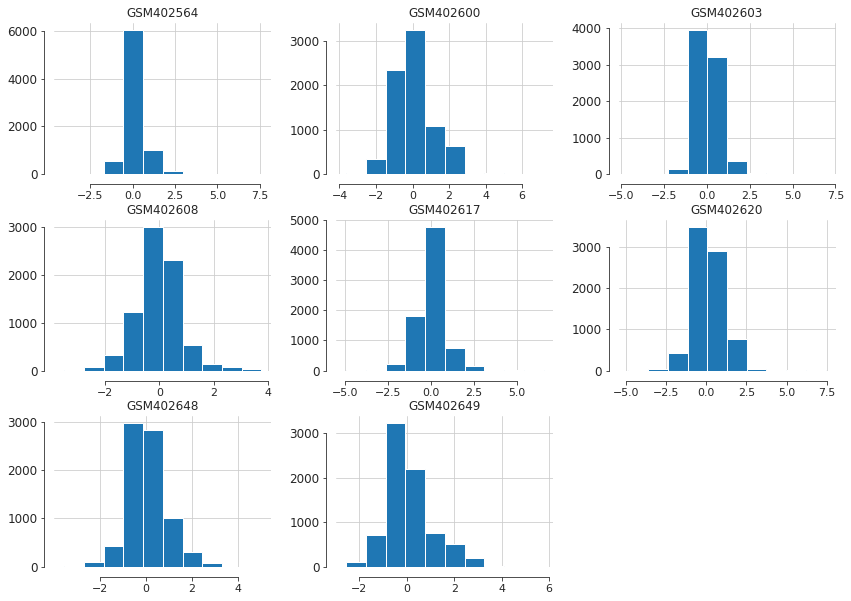

In [ ]:
pivoted_control_samples.hist()
sns.despine(offset=10, trim=True)

In [ ]:
samples = gse.phenotype_data[['submission_date','last_update_date','characteristics_ch1.5.disease','contact_name','contact_country']]

Principais variáveis que gerei:
> *controls* - lista dos GSM dos controles

> *neoplasic_samples* - lista dos GSM das amostras neoplasicas

> *samples* - lista das principais informações das amostras

> *pivoted_neoplasic_samples* - log2 da expressão dos miRNA nas amostras neoplasicas

> *pivoted_control_samples* - log2 da expressão dos miRNA nas amostras controle





In [ ]:
samples['characteristics_ch1.5.disease'].unique()
#Vou dividir em 5 grupos, 1 controle e não vou usar lesional (adenoma)

array(['lesional (FTUMP)', 'safe (CPTC-mut)', 'safe (WDTUMP)',
       'safe (adenoma)', 'safe (CPTC)', 'lesional (WDTUMP)',
       'lesional (FVPTC)', 'safe (FTUMP)', 'lesional (C-PTC- mut)',
       'safe (classic papillary carcinoma)', 'lesional (CPTC)',
       'safe (FVPTC)', 'safe (FTC)', nan, 'lesional (FV-PTC)',
       'lesional (FTC)', 'lesional (CPTC-mut)', 'lesional (CPTC wt2)',
       'lesional (adenoma)', 'lesional (CPTC wt)', 'lesional (CPTC mut5)',
       'lesional (CPTC wt4)', 'safe (CPTC-wt4)', 'LESIONAL (WDTUMP)',
       'lesional (CPTC mut4)'], dtype=object)

In [ ]:
#FTUMP, CPTC, WDTUMP, Control, FVPTC, FTC
lista_grupos = ['FTUMP', 'CPTC', 'WDTUMP', 'FVPTC', 'FTC']
temp=samples['characteristics_ch1.5.disease']
for i in range(len(temp)):
  for j in range(len(lista_grupos)):
    if (str(lista_grupos[j]) in str(temp[i]))==True:
      temp[i] = lista_grupos[j]
    elif ('safe (adenoma)'in str(temp[i])) == True:
      temp[i] = 'Control'
    elif ('lesional (C-PTC- mut)'in str(temp[i])) == True:
      temp[i] = 'CPTC'
    elif ('classic papillary carcinoma'in str(temp[i])) == True:
      temp[i] = 'CPTC'
    elif ('lesional (FV-PTC)'in str(temp[i])) == True:
      temp[i] = 'FVPTC'
      
grupos = pd.DataFrame(temp)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
grupos['characteristics_ch1.5.disease'].unique()

array(['FTUMP', 'CPTC', 'WDTUMP', 'Control', 'FVPTC', 'FTC', nan,
       'lesional (adenoma)'], dtype=object)

In [ ]:
FTUMP_GSM=grupos[grupos['characteristics_ch1.5.disease']=='FTUMP'].index.tolist()
CPTC_GSM=grupos[grupos['characteristics_ch1.5.disease']=='CPTC'].index.tolist()
WDTUMP_GSM=grupos[grupos['characteristics_ch1.5.disease']=='WDTUMP'].index.tolist()
FVPTC_GSM=grupos[grupos['characteristics_ch1.5.disease']=='FVPTC'].index.tolist()
FTC_GSM=grupos[grupos['characteristics_ch1.5.disease']=='FTC'].index.tolist()

Média e desvio padrão por categoria histológica:

In [ ]:
#FTUMP:
pivoted_FTUMP_samples = gse.pivot_samples('VALUE')[FTUMP_GSM]
pivoted_FTUMP_samples['miRNAs']=lista_mir
pivoted_FTUMP_samples=pivoted_FTUMP_samples.dropna().set_index('miRNAs')
pivoted_FTUMP_samples['Mean log2 expression']=pivoted_FTUMP_samples.mean(axis=1)
pivoted_FTUMP_samples['Standard Deviation log2 expression']=pivoted_FTUMP_samples.std(axis=1)
pivoted_FTUMP_samples_statistics=pivoted_FTUMP_samples[['Mean log2 expression','Standard Deviation log2 expression']].dropna()

In [ ]:
#CPTC:
pivoted_CPTC_samples = gse.pivot_samples('VALUE')[CPTC_GSM]
pivoted_CPTC_samples['miRNAs']=lista_mir
pivoted_CPTC_samples=pivoted_CPTC_samples.dropna().set_index('miRNAs')
pivoted_CPTC_samples['Mean log2 expression']=pivoted_CPTC_samples.mean(axis=1)
pivoted_CPTC_samples['Standard Deviation log2 expression']=pivoted_CPTC_samples.std(axis=1)
pivoted_CPTC_samples_statistics=pivoted_CPTC_samples[['Mean log2 expression','Standard Deviation log2 expression']].dropna()

In [ ]:
#WDTUMP:
pivoted_WDTUMP_samples = gse.pivot_samples('VALUE')[WDTUMP_GSM]
pivoted_WDTUMP_samples['miRNAs']=lista_mir
pivoted_WDTUMP_samples=pivoted_WDTUMP_samples.dropna().set_index('miRNAs')
pivoted_WDTUMP_samples['Mean log2 expression']=pivoted_WDTUMP_samples.mean(axis=1)
pivoted_WDTUMP_samples['Standard Deviation log2 expression']=pivoted_WDTUMP_samples.std(axis=1)
pivoted_WDTUMP_samples_statistics=pivoted_WDTUMP_samples[['Mean log2 expression','Standard Deviation log2 expression']].dropna()

In [ ]:
#FVPTC:
pivoted_FVPTC_samples = gse.pivot_samples('VALUE')[FVPTC_GSM]
pivoted_FVPTC_samples['miRNAs']=lista_mir
pivoted_FVPTC_samples=pivoted_FVPTC_samples.dropna().set_index('miRNAs')
pivoted_FVPTC_samples['Mean log2 expression']=pivoted_FVPTC_samples.mean(axis=1)
pivoted_FVPTC_samples['Standard Deviation log2 expression']=pivoted_FVPTC_samples.std(axis=1)
pivoted_FVPTC_samples_statistics=pivoted_FVPTC_samples[['Mean log2 expression','Standard Deviation log2 expression']].dropna()

In [ ]:
#FTC:
pivoted_FTC_samples = gse.pivot_samples('VALUE')[FTC_GSM]
pivoted_FTC_samples['miRNAs']=lista_mir
pivoted_FTC_samples=pivoted_FTC_samples.dropna().set_index('miRNAs')
pivoted_FTC_samples['Mean log2 expression']=pivoted_FTC_samples.mean(axis=1)
pivoted_FTC_samples['Standard Deviation log2 expression']=pivoted_FTC_samples.std(axis=1)
pivoted_FTC_samples_statistics=pivoted_FTC_samples[['Mean log2 expression','Standard Deviation log2 expression']].dropna()

Média e desvio padrão controle:

In [ ]:
#Controle:
pivoted_controls_samples = gse.pivot_samples('VALUE')[controls]
pivoted_controls_samples['miRNAs']=lista_mir
pivoted_controls_samples=pivoted_controls_samples.dropna().set_index('miRNAs')
pivoted_controls_samples['Mean log2 expression']=pivoted_controls_samples.mean(axis=1)
pivoted_controls_samples['Standard Deviation log2 expression']=pivoted_controls_samples.std(axis=1)
pivoted_controls_samples_statistics=pivoted_controls_samples[['Mean log2 expression','Standard Deviation log2 expression']].dropna()

Obtendo o log2FC

In [ ]:
#log2FC (FTUMP/Controle)
log2fc_FTUMP_control=pd.DataFrame(pivoted_FTUMP_samples_statistics['Mean log2 expression'] - pivoted_controls_samples_statistics['Mean log2 expression'])
log2fc_FTUMP_control.columns=['log2FC (FTUMP/control)']
#log2FC (CPTC/Controle)
log2fc_CPTC_control=pd.DataFrame(pivoted_CPTC_samples_statistics['Mean log2 expression'] - pivoted_controls_samples_statistics['Mean log2 expression'])
log2fc_CPTC_control.columns=['log2FC (CPTC/control)']
#log2FC (WDTUMP/Controle)
log2fc_WDTUMP_control=pd.DataFrame(pivoted_WDTUMP_samples_statistics['Mean log2 expression'] - pivoted_controls_samples_statistics['Mean log2 expression'])
log2fc_WDTUMP_control.columns=['log2FC (WDTUMP/control)']
#log2FC (FVPTC/Controle)
log2fc_FVPTC_control=pd.DataFrame(pivoted_FVPTC_samples_statistics['Mean log2 expression'] - pivoted_controls_samples_statistics['Mean log2 expression'])
log2fc_FVPTC_control.columns=['log2FC (FVPTC/control)']
#log2FC (FTC/Controle)
log2fc_FTC_control=pd.DataFrame(pivoted_FTC_samples_statistics['Mean log2 expression'] - pivoted_controls_samples_statistics['Mean log2 expression'])
log2fc_FTC_control.columns=['log2FC (FTC/control)']

Tabelando os up e down regulated miR:

In [ ]:
#FTUMP:
miR_upregulated_FTUMP=log2fc_FTUMP_control[log2fc_FTUMP_control>float(log2fc_FTUMP_control.quantile(0.975))].dropna()
miR_downregulated_FTUMP=log2fc_FTUMP_control[log2fc_FTUMP_control<float(log2fc_FTUMP_control.quantile(0.025))].dropna()
#CPTC:
miR_upregulated_CPTC=log2fc_CPTC_control[log2fc_CPTC_control>float(log2fc_CPTC_control.quantile(0.975))].dropna()
miR_downregulated_CPTC=log2fc_CPTC_control[log2fc_CPTC_control<float(log2fc_CPTC_control.quantile(0.025))].dropna()
#WDTUMP:
miR_upregulated_WDTUMP=log2fc_WDTUMP_control[log2fc_WDTUMP_control>float(log2fc_WDTUMP_control.quantile(0.975))].dropna()
miR_downregulated_WDTUMP=log2fc_WDTUMP_control[log2fc_WDTUMP_control<float(log2fc_WDTUMP_control.quantile(0.025))].dropna()
#FVPTC:
miR_upregulated_FVPTC=log2fc_FVPTC_control[log2fc_FVPTC_control>float(log2fc_FVPTC_control.quantile(0.975))].dropna()
miR_downregulated_FVPTC=log2fc_FVPTC_control[log2fc_FVPTC_control<float(log2fc_FVPTC_control.quantile(0.025))].dropna()
#FTC:
miR_upregulated_FTC=log2fc_FTC_control[log2fc_FTC_control>float(log2fc_FTC_control.quantile(0.975))].dropna()
miR_downregulated_FTC=log2fc_FTC_control[log2fc_FTC_control<float(log2fc_FTC_control.quantile(0.025))].dropna()

In [ ]:
miR_FTUMP=pd.concat([miR_upregulated_FTUMP, miR_downregulated_FTUMP])
miR_CPTC=pd.concat([miR_upregulated_CPTC, miR_downregulated_CPTC])
miR_WDTUMP=pd.concat([miR_upregulated_WDTUMP, miR_downregulated_WDTUMP])
miR_FVPTC=pd.concat([miR_upregulated_FVPTC, miR_downregulated_FVPTC])
miR_FTC=pd.concat([miR_upregulated_FTC, miR_downregulated_FTC])

In [ ]:
miR_WDTUMP.index.unique()

Index(['mir398a', 'mir-210', 'mir-614-s', 'mir-rl1-7', 'mir-bart15',
       'mir474b-s', 'mir-10a', 'mir-494', 'mir-9-1', 'mir-643',
       ...
       'mir447c', 'mir-143-2', 'mir-290', 'mir-m1-2-s', 'mir-374', 'mir-96',
       'let-7f', 'mir-27a', 'let-7a', 'mir-m1-5-s'],
      dtype='object', name='miRNAs', length=138)

In [ ]:
a=pd.merge(miR_FTUMP, miR_CPTC, how='inner', left_index=True, right_index=True)
b=pd.merge(miR_WDTUMP,miR_FVPTC, how='outer', left_index=True, right_index=True)
c=pd.merge(a,b,how='outer', left_index=True, right_index=True)
mirna_desregulados=pd.merge(c,miR_FTC,how='outer', left_index=True, right_index=True)

In [ ]:
a

,log2FC (FTUMP/control),log2FC (CPTC/control)
miRNAs,,
mir-126,-1.999103,-2.148971
mir-126,-1.999103,-2.213146
mir-126,-1.999103,-2.195523
mir-126,-1.999103,-2.194817
mir-126,-1.999103,-1.802196
...,...,...
mir474c-s,0.767918,1.052149
mir474c-s,1.325546,1.515517
mir474c-s,1.325546,1.052149


Final:

In [ ]:
mirna_desregulados

,log2FC (FTUMP/control),log2FC (CPTC/control),log2FC (WDTUMP/control),log2FC (FVPTC/control),log2FC (FTC/control)
miRNAs,,,,,
let-7,NaN,NaN,NaN,-1.632486,NaN
let-7a,-1.612379,NaN,-1.565674,-1.676474,NaN
let-7a,-1.612379,NaN,-1.565674,-1.632682,NaN
let-7a,-1.612379,NaN,-1.565674,-1.776550,NaN
let-7a,-1.612379,NaN,-1.565674,-1.663510,NaN
...,...,...,...,...,...
mir478f,0.787385,NaN,0.739088,NaN,0.833874
mir478f,0.787385,NaN,0.739088,NaN,0.956662
mir538c,0.752736,NaN,NaN,NaN,NaN


#GSE97070

In [ ]:
#miRNA and gene expression profiling in human thyroid carcinomas and non-neoplastic thyroids:
gse = GEOparse.get_GEO(lista_gse[41])

04-Dec-2020 17:58:46 DEBUG utils - Directory ./ already exists. Skipping.
04-Dec-2020 17:58:46 INFO GEOparse - File already exist: using local version.
04-Dec-2020 17:58:46 INFO GEOparse - Parsing ./GSE97070_family.soft.gz: 
04-Dec-2020 17:58:46 DEBUG GEOparse - DATABASE: GeoMiame
04-Dec-2020 17:58:46 DEBUG GEOparse - SERIES: GSE97070
04-Dec-2020 17:58:46 DEBUG GEOparse - PLATFORM: GPL18402
04-Dec-2020 17:58:46 WARNING GEOTypes - Detected duplicated columns in d GPL18402. Correcting.

04-Dec-2020 17:58:46 DEBUG GEOparse - SAMPLE: GSM2550963
04-Dec-2020 17:58:46 DEBUG GEOparse - SAMPLE: GSM2550964
04-Dec-2020 17:58:46 DEBUG GEOparse - SAMPLE: GSM2550965
04-Dec-2020 17:58:46 DEBUG GEOparse - SAMPLE: GSM2550966
04-Dec-2020 17:58:46 DEBUG GEOparse - SAMPLE: GSM2550967
04-Dec-2020 17:58:46 DEBUG GEOparse - SAMPLE: GSM2550968
04-Dec-2020 17:58:46 DEBUG GEOparse - SAMPLE: GSM2550969
04-Dec-2020 17:58:46 DEBUG GEOparse - SAMPLE: GSM2550970
04-Dec-2020 17:58:46 DEBUG GEOparse - SAMPLE: GSM25509

In [ ]:
gse.gpls['GPL18402'].table

,ID,miRNA_ID,ACCESSION_STRING,CONTROL_TYPE,SPOT_ID,SPOT_ID.1
0,hsa-let-7a-3p,hsa-let-7a-3p,mir|hsa-let-7a-3p|mir|MIMAT0004481|mir|hsa-let...,False,NaN,NaN
1,hsa-let-7a-5p,hsa-let-7a-5p,mir|hsa-let-7a-5p|mir|MIMAT0000062|mir|hsa-let...,False,NaN,NaN
2,hsa-let-7b-3p,hsa-let-7b-3p,mir|hsa-let-7b-3p|mir|MIMAT0004482|mir|hsa-let...,False,NaN,NaN
3,hsa-let-7b-5p,hsa-let-7b-5p,mir|hsa-let-7b-5p|mir|MIMAT0000063|mir|hsa-let...,False,NaN,NaN
4,hsa-let-7c,hsa-let-7c,mir|hsa-let-7c|mir|MIMAT0000064,False,NaN,NaN
...,...,...,...,...,...,...
2025,hur_6,NaN,NaN,NaN,hur_6,NaN
2026,hur_5,NaN,NaN,NaN,hur_5,NaN
2027,dmr_308,NaN,NaN,NaN,dmr_308,NaN
2028,hur_1,NaN,NaN,NaN,hur_1,NaN


In [ ]:
gse.gsms["GSM2550982"]

KeyError: ignored

In [ ]:
gse.phenotype_data

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,characteristics_ch1.0.sampleID,characteristics_ch1.1.tissue,characteristics_ch1.2.disease state,characteristics_ch1.3.patient_id,molecule_ch1,extract_protocol_ch1,label_ch1,label_protocol_ch1,hyb_protocol,scan_protocol,data_processing,platform_id,contact_name,contact_email,contact_laboratory,contact_department,contact_institute,contact_address,contact_city,contact_zip/postal_code,contact_country,supplementary_file,series_id,data_row_count
GSM2550963,Thyroid_lymph_node_metastasis_from_patient_I1,GSM2550963,Public on Mar 01 2018,Mar 27 2017,Mar 01 2018,RNA,1,Thyroid_lymph_node_metastasis,Homo sapiens,9606,M1,Thyroid,Thyroid_lymph_node_metastasis,I1,total RNA,"Total RNA, including the miRNA fraction, was e...",Cy3,Total RNA from each sample was labeled accordi...,Standard Agilent hybridization protocol,Standard Agilent scanning protocol with Agilen...,Scanned images were processed with Agilent Fea...,GPL18402,"Matteo,,Dugo",matteo.dugo@istitutotumori.mi.it,Platform of Integrated Biology,Department of Applied Research And Technology ...,Fondazione IRCCS Istituto Nazionale dei Tumori,via Amadeo 42,Milan,20133,Italy,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2550...,GSE97070,2027
GSM2550964,Thyroid_lymph_node_metastasis_from_patient_I2,GSM2550964,Public on Mar 01 2018,Mar 27 2017,Mar 01 2018,RNA,1,Thyroid_lymph_node_metastasis,Homo sapiens,9606,M2,Thyroid,Thyroid_lymph_node_metastasis,I2,total RNA,"Total RNA, including the miRNA fraction, was e...",Cy3,Total RNA from each sample was labeled accordi...,Standard Agilent hybridization protocol,Standard Agilent scanning protocol with Agilen...,Scanned images were processed with Agilent Fea...,GPL18402,"Matteo,,Dugo",matteo.dugo@istitutotumori.mi.it,Platform of Integrated Biology,Department of Applied Research And Technology ...,Fondazione IRCCS Istituto Nazionale dei Tumori,via Amadeo 42,Milan,20133,Italy,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2550...,GSE97070,2027
GSM2550965,Thyroid_lymph_node_metastasis_from_patient_I3_1,GSM2550965,Public on Mar 01 2018,Mar 27 2017,Mar 01 2018,RNA,1,Thyroid_lymph_node_metastasis,Homo sapiens,9606,M3_1,Thyroid,Thyroid_lymph_node_metastasis,I3,total RNA,"Total RNA, including the miRNA fraction, was e...",Cy3,Total RNA from each sample was labeled accordi...,Standard Agilent hybridization protocol,Standard Agilent scanning protocol with Agilen...,Scanned images were processed with Agilent Fea...,GPL18402,"Matteo,,Dugo",matteo.dugo@istitutotumori.mi.it,Platform of Integrated Biology,Department of Applied Research And Technology ...,Fondazione IRCCS Istituto Nazionale dei Tumori,via Amadeo 42,Milan,20133,Italy,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2550...,GSE97070,2027
GSM2550966,Thyroid_lymph_node_metastasis_from_patient_I3_2,GSM2550966,Public on Mar 01 2018,Mar 27 2017,Mar 01 2018,RNA,1,Thyroid_lymph_node_metastasis,Homo sapiens,9606,M3_2,Thyroid,Thyroid_lymph_node_metastasis,I3,total RNA,"Total RNA, including the miRNA fraction, was e...",Cy3,Total RNA from each sample was labeled accordi...,Standard Agilent hybridization protocol,Standard Agilent scanning protocol with Agilen...,Scanned images were processed with Agilent Fea...,GPL18402,"Matteo,,Dugo",matteo.dugo@istitutotumori.mi.it,Platform of Integrated Biology,Department of Applied Research And Technology ...,Fondazione IRCCS Istituto Nazionale dei Tumori,via Amadeo 42,Milan,20133,Italy,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2550...,GSE97070,2027
GSM2550967,Thyroid_lymph_node_metastasis_from_patient_I4,GSM2550967,Public on Mar 01 2018,Mar 27 2017,Mar 01 2018,RNA,1,Thyroid_lymph_node_metastasis,Homo sapiens,9606,M4,Thyroid,Thyroid_lymph_node_metastasis,I4,total RNA,"Total RNA, including the miRNA fraction, was e...",Cy3,Total RNA from each sample was labeled accordi...,Standard Agilent hybridization protocol,Standard Agilent scanning protocol with Agilen...,Scanned images w

In [ ]:
controls=gse.phenotype_data[gse.phenotype_data['characteristics_ch1.2.disease state'].str.startswith('Normal_thyroid')].index.tolist()
pivoted_control_samples = gse.pivot_samples('VALUE')[controls]
pivoted_control_samples

name,GSM2550972,GSM2550973,GSM2550974
ID_REF,,,
Blank,6.886177,6.886177,6.886177
NC1_00000197,8.507215,8.470753,8.451138
NC1_00000215,8.636389,8.571787,8.524397
NC2_00079215,8.447726,8.402824,8.388171
NC2_00092197,8.479138,8.467143,8.427406
...,...,...,...
hur_4,14.440095,14.094568,14.943165
hur_5,11.359949,11.083612,11.571886
hur_6,16.669247,15.881365,16.567322


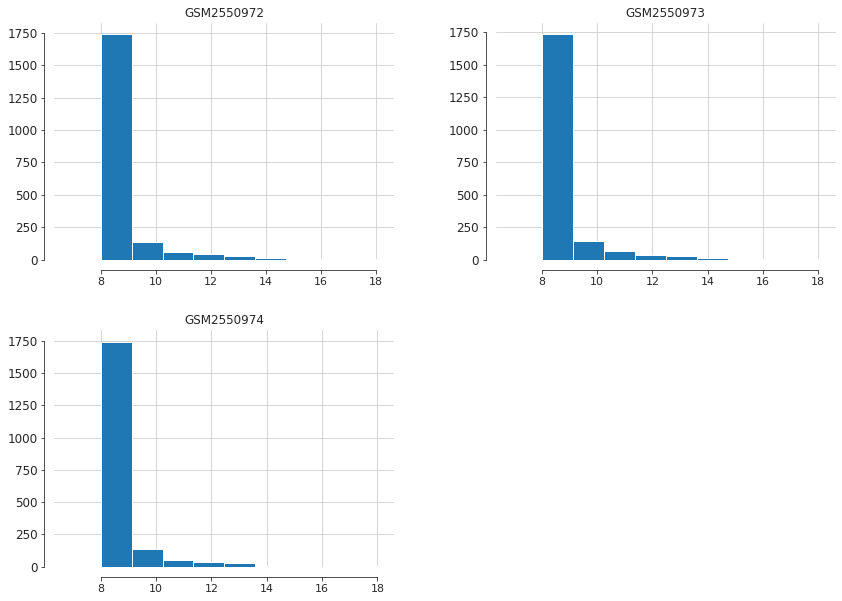

In [ ]:
pivoted_control_samples.hist()
sns.despine(offset=10, trim=True)

In [ ]:
neoplasic1=gse.phenotype_data[gse.phenotype_data['characteristics_ch1.2.disease state'].str.startswith('Thyroid_primary_tumor')]
neoplasic2=gse.phenotype_data[gse.phenotype_data['characteristics_ch1.2.disease state'].str.startswith('Thyroid_lymph_node_metastasis')]
neoplasic=pd.merge(neoplasic1, neoplasic2, how='outer', left_index=True, right_index=True).index.tolist()
pivoted_neoplasic_samples = gse.pivot_samples('VALUE')[neoplasic]
pivoted_neoplasic_samples

name,GSM2550963,GSM2550964,GSM2550965,GSM2550966,GSM2550967,GSM2550968,GSM2550969,GSM2550970,GSM2550971,GSM2550975,GSM2550976,GSM2550977,GSM2550978,GSM2550979,GSM2550980,GSM2550981,GSM2550982
ID_REF,,,,,,,,,,,,,,,,,
Blank,6.886177,6.886177,6.886177,6.886177,6.886177,6.888550,6.886177,6.886177,6.886177,6.886177,6.886177,6.886177,6.886177,6.886177,6.886177,6.886177,6.886177
NC1_00000197,8.429886,8.421658,8.390541,8.418289,8.398916,8.420005,8.369354,8.411205,8.399035,8.423654,8.431323,8.426837,8.420403,8.429536,8.390679,8.379983,8.383853
NC1_00000215,8.530117,8.468170,8.430281,8.501265,8.424839,8.458179,8.396807,8.427944,8.428634,8.453259,8.479771,8.463979,8.474296,8.452580,8.404644,8.405792,8.392592
NC2_00079215,8.384412,8.383137,8.375883,8.392687,8.376637,8.359570,8.345866,8.360918,8.364849,8.370593,8.390202,8.390575,8.381754,8.387817,8.380339,8.344488,8.360792
NC2_00092197,8.425376,8.419227,8.389526,8.423013,8.388532,8.387707,8.366616,8.395378,8.396060,8.406516,8.418046,8.423991,8.427766,8.414526,8.382067,8.379115,8.376149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hur_4,14.138468,14.148568,13.735126,14.507942,15.021193,14.730830,14.792466,14.250652,15.507180,13.948490,14.599939,13.655651,14.796734,14.698904,15.175684,14.245679,15.428246
hur_5,10.151034,10.044916,10.340948,10.429622,11.779295,11.325318,10.839148,10.225563,11.355055,10.409775,9.869802,10.225218,11.523516,11.112002,10.729059,9.826889,11.548803
hur_6,16.709169,16.999192,16.208642,16.854625,16.962466,16.649560,17.034393,16.691068,16.796243,17.037698,16.999402,15.419502,16.984181,16.681261,16.813725,17.046165,17.002977


Principais variáveis que gerei:
> *controls* - lista dos GSM dos controles

> *neoplasic* - lista dos GSM das amostras neoplasicas

> *neoplasic_samples* - lista das principais informações das amostras neoplasicas

> *non_neoplasic_samples* - lista das principais informações das amostras controle

> *pivoted_neoplasic_samples* - log2 da expressão dos miRNA nas amostras neoplasicas

> *pivoted_control_samples* - log2 da expressão dos miRNA nas amostras controle





In [ ]:
PTC_lymph_node_metastasis_GSM=gse.phenotype_data[gse.phenotype_data['characteristics_ch1.2.disease state'].str.startswith('Thyroid_lymph_node_metastasis')].index.tolist()
Thyroid_primary_tumor_GSM=gse.phenotype_data[gse.phenotype_data['characteristics_ch1.2.disease state'].str.startswith('Thyroid_primary_tumor')].index.tolist()

Média e desvio padrão por categoria histológica:

In [ ]:
#PTC_lymph_node_metastasis:
pivoted_PTC_lymph_node_metastasis_samples = pivoted_neoplasic_samples[PTC_lymph_node_metastasis_GSM]
pivoted_PTC_lymph_node_metastasis_samples['Mean log2 expression']=pivoted_PTC_lymph_node_metastasis_samples.mean(axis=1)
pivoted_PTC_lymph_node_metastasis_samples['Standard Deviation log2 expression']=pivoted_PTC_lymph_node_metastasis_samples.std(axis=1)
pivoted_PTC_lymph_node_metastasis_samples_statistics=pivoted_PTC_lymph_node_metastasis_samples[['Mean log2 expression','Standard Deviation log2 expression']].dropna()
pivoted_PTC_lymph_node_metastasis_samples_statistics

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


name,Mean log2 expression,Standard Deviation log2 expression
ID_REF,,
Blank,6.886440,0.000746
NC1_00000197,8.406543,0.017851
NC1_00000215,8.451804,0.039734
NC2_00079215,8.371551,0.013953
NC2_00092197,8.399048,0.018496
...,...,...
hur_4,14.536936,0.507069
hur_5,10.721211,0.592352
hur_6,16.767262,0.237304


In [ ]:
#Thyroid_primary_tumor:
Thyroid_primary_tumor_samples = pivoted_neoplasic_samples[Thyroid_primary_tumor_GSM]
Thyroid_primary_tumor_samples['Mean log2 expression']=Thyroid_primary_tumor_samples.mean(axis=1)
Thyroid_primary_tumor_samples['Standard Deviation log2 expression']=Thyroid_primary_tumor_samples.std(axis=1)
Thyroid_primary_tumor_samples_statistics=Thyroid_primary_tumor_samples[['Mean log2 expression','Standard Deviation log2 expression']].dropna()
Thyroid_primary_tumor_samples_statistics

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


name,Mean log2 expression,Standard Deviation log2 expression
ID_REF,,
Blank,6.886177,8.881784e-16
NC1_00000197,8.410784,2.051689e-02
NC1_00000215,8.440864,3.226618e-02
NC2_00079215,8.375820,1.524378e-02
NC2_00092197,8.403522,1.985294e-02
...,...,...
hur_4,14.568666,5.589989e-01
hur_5,10.655633,6.436895e-01
hur_6,16.748114,5.160555e-01


Média e desvio padrão controle:

In [ ]:
#Controle:
pivoted_control_samples['Mean log2 expression']=pivoted_control_samples.mean(axis=1)
pivoted_control_samples['Standard Deviation log2 expression']=pivoted_control_samples.std(axis=1)
pivoted_control_samples_statistics=pivoted_control_samples[['Mean log2 expression','Standard Deviation log2 expression']].dropna()
pivoted_control_samples_statistics

name,Mean log2 expression,Standard Deviation log2 expression
ID_REF,,
Blank,6.886177,0.000000
NC1_00000197,8.476368,0.023235
NC1_00000215,8.577524,0.045900
NC2_00079215,8.412907,0.025337
NC2_00092197,8.457896,0.022109
...,...,...
hur_4,14.492609,0.348423
hur_5,11.338482,0.199914
hur_6,16.372645,0.349870


Obtendo o log2FC

In [ ]:
#log2FC (Thyroid_primary_tumor/Controle)
log2fc_Thyroid_primary_tumor_control=pd.DataFrame(Thyroid_primary_tumor_samples_statistics['Mean log2 expression'] - pivoted_control_samples_statistics['Mean log2 expression'])
log2fc_Thyroid_primary_tumor_control.columns=['log2FC (Thyroid_primary_tumor/control)']
#log2FC (PTC_lymph_node_metastasis/Thyroid_primary_tumor)
log2fc_PTC_lymph_node_metastasis_Thyroid_primary_tumor=pd.DataFrame(pivoted_PTC_lymph_node_metastasis_samples_statistics['Mean log2 expression'] - Thyroid_primary_tumor_samples_statistics['Mean log2 expression'])
log2fc_PTC_lymph_node_metastasis_Thyroid_primary_tumor.columns=['log2FC (PTC_lymph_node_metastasis/Thyroid_primary_tumor)']
#log2FC (PTC_lymph_node_metastasis/Controle)
log2fc_PTC_lymph_node_metastasis_control=pd.DataFrame(pivoted_PTC_lymph_node_metastasis_samples_statistics['Mean log2 expression'] - pivoted_control_samples_statistics['Mean log2 expression'])
log2fc_PTC_lymph_node_metastasis_control.columns=['log2FC (PTC lymph node metastasis/control)']

Tabelando os up e down regulated miR:

In [ ]:
temp2

name,GSM2550972,GSM2550973,GSM2550974
ID_REF,,,
Blank,6.886177,6.886177,6.886177
NC1_00000197,8.507215,8.470753,8.451138
NC1_00000215,8.636389,8.571787,8.524397
NC2_00079215,8.447726,8.402824,8.388171
NC2_00092197,8.479138,8.467143,8.427406
...,...,...,...
hur_4,14.440095,14.094568,14.943165
hur_5,11.359949,11.083612,11.571886
hur_6,16.669247,15.881365,16.567322


In [ ]:
#Thyroid_primary_tumor/Controle Teste-t:
temp1=pivoted_neoplasic_samples[PTC_lymph_node_metastasis_GSM]
temp2=pivoted_control_samples[controls]
temp3=log2fc_PTC_lymph_node_metastasis_control

st, p = stats.ttest_ind(a=temp1,b=temp2, axis=1)
p_test=pd.DataFrame(data=p, index=temp1.index.tolist(), columns=['p-valor'])
b=pd.merge(temp3, p_test, how='outer', left_index=True, right_index=True )

a = statsmodels.stats.multitest.multipletests(pvals=p, method='fdr_bh')
p_test_adjusted=pd.DataFrame(data=a[1].tolist(), index=temp1.index.tolist(), columns=['p-valor ajustado'])

metastasis = pd.merge(b, p_test_adjusted, how='outer', left_index=True, right_index=True).drop_duplicates()
metastasis=metastasis[metastasis.index.str.startswith('hsa')].sort_values(by='log2FC (PTC lymph node metastasis/control)')
metastasis=metastasis[metastasis['p-valor ajustado']<0.05]
metastasis

,log2FC (PTC lymph node metastasis/control),p-valor,p-valor ajustado
ID_REF,,,
hsa-miR-30a-5p,-3.631733,2.507764e-10,1.694412e-07
hsa-miR-130a-3p,-2.686894,2.793920e-07,6.292528e-05
hsa-let-7i-5p,-2.413005,5.507789e-05,4.293957e-03
hsa-miR-100-5p,-2.235607,8.436734e-08,2.443037e-05
hsa-miR-126-3p,-2.089840,8.512963e-04,1.691743e-02
...,...,...,...
hsa-miR-4430,1.844423,2.522435e-04,9.296318e-03
hsa-miR-6132,1.925831,8.621506e-05,5.413217e-03
hsa-miR-4465,2.146452,4.135228e-04,1.259114e-02


#PTC lymph node metastasis x control GSE97070 versus PTC lymph node metastasis - GSE104006:

In [ ]:
df1=pd.read_excel("/content/drive/My Drive/IC/Tabelas GEO/PTC lymph node metastasis x control GSE97070.xlsx")
df2=pd.read_excel("/content/drive/My Drive/IC/Tabelas GEO/PTC lymph node metastasis - GSE104006.xlsx")

table=pd.merge(df1, df2, how='inner', left_on='ID_REF', right_on='ID_REF', suffixes=(' GSE97070', ' GSE104006'))
table[table['log2FC (PTC lymph node metastasis/control) GSE97070']<-1]


,ID_REF,log2FC (PTC lymph node metastasis/control) GSE97070,p-valor GSE97070,p-valor ajustado GSE97070,log2FC (PTC lymph node metastasis/control) GSE104006,p-valor GSE104006,p-valor ajustado GSE104006
0,hsa-miR-204-5p,-1.270612,6.951655e-12,1.409100e-08,-3.312890,0.000111,0.013007
1,hsa-miR-30a-3p,-1.716326,4.740552e-11,4.804550e-08,-1.105085,0.000636,0.038837
5,hsa-miR-30c-5p,-1.984856,3.740299e-05,3.296342e-03,-1.574895,0.000135,0.014639
7,hsa-miR-199b-5p,-1.003003,4.428381e-04,1.259114e-02,-3.759097,0.000002,0.001057
8,hsa-miR-199a-3p,-1.141023,6.164616e-03,4.593999e-02,-2.185909,0.000041,0.006920


#cBioPortal:

In [ ]:
df1=pd.read_csv("/content/drive/My Drive/genie_public_clinical_data.tsv", delimiter="\t")
df1=df1[df1['Sample Type']=='Metastasis']
len(df1)


385

In [ ]:
df2=pd.read_csv("/content/drive/My Drive/Mutated_Genes.txt", delimiter="\t")
a=df2['#'].apply(lambda x: (x-df2['#'].mean())/df2['#'].std())
a=pd.DataFrame(data=a)
b=pd.merge(a, df2, how='inner', left_index=True, right_index=True)
b[['Gene','#_x']]

,Gene,#_x
0,RET,5.438994
1,BRAF,3.528713
2,TERT,0.981672
3,FAT1,0.344912
4,HRAS,0.344912
5,TP53,0.344912
6,ARID1A,0.344912
7,PALB2,0.344912
8,ATM,-0.291848
9,ATR,-0.291848


In [ ]:
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

In [ ]:
df3=pd.read_csv("/content/drive/My Drive/Mutated_Genes (1).txt", delimiter="\t")
a=df3['#'].apply(lambda x: (x-df3['#'].mean())/df3['#'].std())
a=pd.DataFrame(data=a)
b=pd.merge(a, df3, how='inner', left_index=True, right_index=True)
b=b[['Gene','#_x']]
b=b[b['#_x']>1]
b

,Gene,#_x
0,BRAF,14.955474
1,TERT,10.084336
2,RET,4.838494
3,TP53,1.316285
4,NRAS,1.016523


In [ ]:
df3['Gene']

0         BRAF
1         TERT
2          RET
3         TP53
4         NRAS
        ...   
360      FOXP4
361    ANKRD24
362       FLCN
363      NEGR1
364    SNORA56
Name: Gene, Length: 365, dtype: object